In [68]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from glob import glob
import pickle
%matplotlib inline

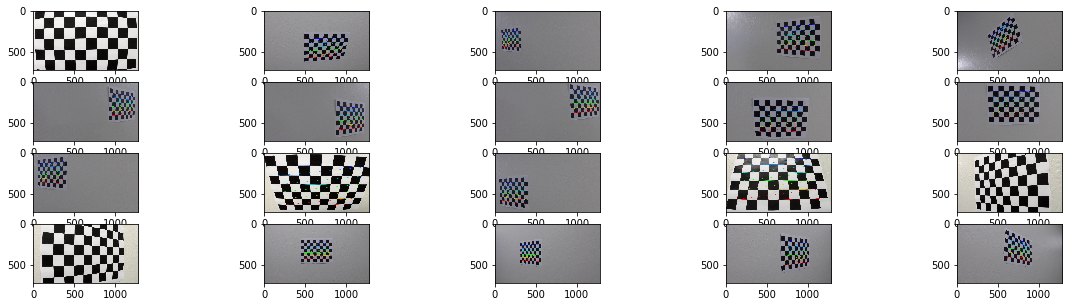

In [84]:
nx = 9
ny = 6

images = glob('camera_cal/*.jpg')

# Create objectpoints, imagepoints
objpoints = []
imgpoints = []

objp = np.zeros((nx * ny, 3), np.float32)
objp[:,:2] = np.mgrid[0: nx, 0: ny].T.reshape(-1, 2)


plt.figure(figsize = (20, 5))
plt.title('calibration')

i=0

for img in images:

    plt.subplot(4, 5, i+1)

    img = plt.imread(img)

    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find Conners
    ret, corners = cv2.findChessboardCorners(gray_img,(nx,ny),None)
    i += 1
    if ret == True:
        #Draw Point 
        cv2.drawChessboardCorners(img,(nx,ny),corners,ret)

        objpoints.append(objp)
        imgpoints.append(corners)
        plt.imshow(img)
    else:
        plt.imshow(img)
plt.show()

In [91]:
# Calibrate_Camera
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1],img.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

In [92]:
# Save mtx, dist
data = {'mtx': mtx, 'dist': dist}
pickle.dump(data, open("camera_calibration.p", "wb"))

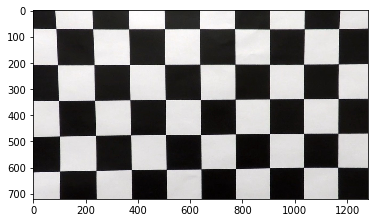

In [93]:
# Undistort example calibration image
img = plt.imread('camera_cal/calibration1.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)